In [2]:
import pandas as pd

In [10]:
data = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv",index_col=0)

In [15]:
print(data.shape)
data.head()

(200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


* TV, Radio, and Newspaper columns show the amount of advertising dollar spent on them respectively. Will use these 3 columns as features
* Sales column show sales of a single product in a given market. Use as response.

Becase the response variable is continous, this is a regression problem. 

There are 200 observations, each represents a single market.

In [18]:
import seaborn as sns
%matplotlib inline

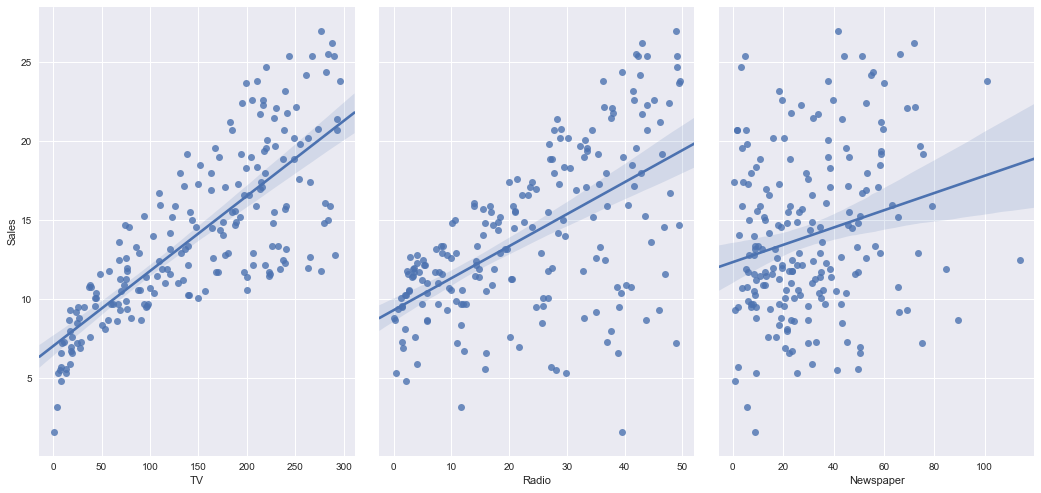

In [25]:
# visualize the relationship between features and response
sns.pairplot(data, x_vars=["TV","Radio","Newspaper"], y_vars="Sales",
            size=7, aspect=0.7, kind="reg");

# Linear Regression
**Pros:** fast, no tuning required, highly interpretable, well-understood  
**Cons:** unlikely to produce the best predictive accuracy

# Preparing X and y using pands
*Note: Pandas is built on top of NumPy, thus, X can be a dataframe (instead of Matrix) and y can be a pandas series (instead of vector)

In [26]:
feature_cols = ['TV','Radio','Newspaper']
X = data[feature_cols]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [27]:
y = data['Sales'] # or use y=data.Sales, return a Series
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

# Splitting X and y into training and testing sets

In [28]:
from sklearn.cross_validation import train_test_split
# default split is 75% for training and 25% for testing
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [32]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [35]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046564567874150281),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804347)]

* Note: This is a statement of association, not causation (there are many other elements that may influence sales amount, here only ad expenses)

# Model evaluation metrics for regression
There are 3 most common metrics for regression:
1. Mean Absolute Error(MAE): easiest, average error
2. Mean Squared Error(MSE): more popular than MAE, cause it punishes larger errors
3. Root Mean Squared Error(RMSE): even more popular than MSE, cause it is interpretable in "y" units

# Feature Selection
Remove 'Newspaper' from the model and check the RMSE!

In [40]:
import numpy as np
from sklearn import metrics

feature_cols = ['TV','Radio']
X = data[feature_cols]
y = data.Sales

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
# compute the RMSE of our predictions
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.3879034699382888

**RMSE decreased** when we remove Newspaper from the model. (lower error, better model)

# Cross-Validation, feature selection
This section continue from Notebook 'Scikit-learn Basics'

In [45]:
lm = LinearRegression()
from sklearn.cross_validation import cross_val_score
# 'mean_squared_error' is changed to 'neg_mean_squared_error' 
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)
# Note the scores are all negative, which is not good. 
# Fix the sign of all scores:
mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores.mean())

[-3.38264572 -3.28736055 -2.09185507 -2.81784389 -1.27311083 -1.74391853
 -8.0006111  -2.07650936 -3.03635301 -2.4289835 ]
1.67967484191


In [46]:
# check after removing 'Newspaper':
feature_cols = ['TV','Radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, 
                               scoring='neg_mean_squared_error')).mean())

1.67967484191
